# Tiroteos escolares USA 1990-presente

#### 1.-Importar libreria y base de datos

In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
df = pd.read_csv("pah_wikp_combo.csv")
df

,Date,City,State,Latitud,Longitud,AreaType,School,Fatalitie,Wounded,Dupe,Source
0,3/27/90,Brooklyn,New York,40.664300,-73.9385,NaN,C,0,1.0,NaN,Wikp
1,5/20/90,Centerville,Tenneesee,35.750350,-86.250270,1,HS,1,NaN,NaN,Pah
2,8/26/90,Las Vegas,Nevada,39.250210,-116.751190,2,HS,1,NaN,NaN,Pah
3,09/11/1990,San Antonio,Texas,20.025560,-99.195560,NaN,HS,0,3.0,NaN,Wikp
4,01/08/1991,Ri1hardson,Texas,20.025560,-99.195560,2,HS,0,NaN,NaN,Pah
...,...,...,...,...,...,...,...,...,...,...,...
690,1/14/20,Bellaire,Texas,20.025560,-99.195560,NaN,HS,1,0.0,NaN,Wikp
691,1/14/20,Fort Worth,Texas,20.025560,-99.195560,NaN,HS,0,2.0,NaN,Wikp
692,1/23/20,Oxnard,California,37.250220,-119.7512600,NaN,ES,0,1.0,NaN,Wikp
693,02/03/2020,Commerce,Texas,20.025560,-99.195560,NaN,C,2,1.0,NaN,Wikp


El csv. lo puse en la carpeta 7mo. Semestre, Mineria de datos, Etapa 3 

In [3]:
df = pd.read_csv("pah_wikp_combo.csv",encoding='utf8')
df

,Date,City,State,Latitud,Longitud,AreaType,School,Fatalitie,Wounded,Dupe,Source
0,3/27/90,Brooklyn,New York,40.664300,-73.9385,NaN,C,0,1.0,NaN,Wikp
1,5/20/90,Centerville,Tenneesee,35.750350,-86.250270,1,HS,1,NaN,NaN,Pah
2,8/26/90,Las Vegas,Nevada,39.250210,-116.751190,2,HS,1,NaN,NaN,Pah
3,09/11/1990,San Antonio,Texas,20.025560,-99.195560,NaN,HS,0,3.0,NaN,Wikp
4,01/08/1991,Ri1hardson,Texas,20.025560,-99.195560,2,HS,0,NaN,NaN,Pah
...,...,...,...,...,...,...,...,...,...,...,...
690,1/14/20,Bellaire,Texas,20.025560,-99.195560,NaN,HS,1,0.0,NaN,Wikp
691,1/14/20,Fort Worth,Texas,20.025560,-99.195560,NaN,HS,0,2.0,NaN,Wikp
692,1/23/20,Oxnard,California,37.250220,-119.7512600,NaN,ES,0,1.0,NaN,Wikp
693,02/03/2020,Commerce,Texas,20.025560,-99.195560,NaN,C,2,1.0,NaN,Wikp


El utf8 se utiliza generalmente para simbolos extraños.
SCHOOL --> C = universidad, HS = escuela secundaria, MS = escuela intermedia, ES = escuela primaria, - = desconocido
AREATYPE --> urban=urbano, suburban=suburbano, NaN=otros
WOUNDED --> NaN=no hubo ningun herido

## 2.- Visualización de datos

Una vez que ya tenemos cargada nuestra base de datos al notebook, podemos empezar a manipularla. Para poder fijar el objetivo de nuestra limpieza, primero tenemos que revisar cuales son los datos que conforman la base de datos 

In [4]:
df.shape

(695, 11)

Con esta instrucción de shape nos enteramos de cuantas filas y cuantas columnas cuenta nuestra base de datos 

In [5]:
df.head()

,Date,City,State,Latitud,Longitud,AreaType,School,Fatalitie,Wounded,Dupe,Source
0,3/27/90,Brooklyn,New York,40.664300,-73.9385,NaN,C,0,1.0,NaN,Wikp
1,5/20/90,Centerville,Tenneesee,35.750350,-86.250270,1,HS,1,NaN,NaN,Pah
2,8/26/90,Las Vegas,Nevada,39.250210,-116.751190,2,HS,1,NaN,NaN,Pah
3,09/11/1990,San Antonio,Texas,20.025560,-99.195560,NaN,HS,0,3.0,NaN,Wikp
4,01/08/1991,Ri1hardson,Texas,20.025560,-99.195560,2,HS,0,NaN,NaN,Pah


 Nos muestras los datos de los "primeros" 5 renglones 

In [6]:
df.tail()

,Date,City,State,Latitud,Longitud,AreaType,School,Fatalitie,Wounded,Dupe,Source
690,1/14/20,Bellaire,Texas,20.025560,-99.195560,NaN,HS,1,0.0,NaN,Wikp
691,1/14/20,Fort Worth,Texas,20.025560,-99.195560,NaN,HS,0,2.0,NaN,Wikp
692,1/23/20,Oxnard,California,37.250220,-119.7512600,NaN,ES,0,1.0,NaN,Wikp
693,02/03/2020,Commerce,Texas,20.025560,-99.195560,NaN,C,2,1.0,NaN,Wikp
694,9/16/20,Sonora,California,37.250220,-119.7512600,NaN,HS,1,0.0,NaN,Wikp


  Nos muestras los datos de los "ultimos" 5 renglones 

In [7]:
df.columns

Index(['Date', 'City', 'State', 'Latitud', 'Longitud', 'AreaType', 'School',
       'Fatalitie', 'Wounded', 'Dupe', 'Source'],
      dtype='object')

### 5.- Traducir el nombre de las columnas

In [8]:
df.columns = ['Fecha','Ciudad','Estado','Latitud','Longitud','Tipo_de_área','Escuela','Muertes','Heridos','True','Wikp_o_Pah']
df.columns

Index(['Fecha', 'Ciudad', 'Estado', 'Latitud', 'Longitud', 'Tipo_de_área',
       'Escuela', 'Muertes', 'Heridos', 'True', 'Wikp_o_Pah'],
      dtype='object')

In [9]:
df

,Fecha,Ciudad,Estado,Latitud,Longitud,Tipo_de_área,Escuela,Muertes,Heridos,True,Wikp_o_Pah
0,3/27/90,Brooklyn,New York,40.664300,-73.9385,NaN,C,0,1.0,NaN,Wikp
1,5/20/90,Centerville,Tenneesee,35.750350,-86.250270,1,HS,1,NaN,NaN,Pah
2,8/26/90,Las Vegas,Nevada,39.250210,-116.751190,2,HS,1,NaN,NaN,Pah
3,09/11/1990,San Antonio,Texas,20.025560,-99.195560,NaN,HS,0,3.0,NaN,Wikp
4,01/08/1991,Ri1hardson,Texas,20.025560,-99.195560,2,HS,0,NaN,NaN,Pah
...,...,...,...,...,...,...,...,...,...,...,...
690,1/14/20,Bellaire,Texas,20.025560,-99.195560,NaN,HS,1,0.0,NaN,Wikp
691,1/14/20,Fort Worth,Texas,20.025560,-99.195560,NaN,HS,0,2.0,NaN,Wikp
692,1/23/20,Oxnard,California,37.250220,-119.7512600,NaN,ES,0,1.0,NaN,Wikp
693,02/03/2020,Commerce,Texas,20.025560,-99.195560,NaN,C,2,1.0,NaN,Wikp


 En este caso no cambie el nombre de las columnas lo unico que hice fue traducirlas 

In [10]:
df.dtypes

Fecha            object
Ciudad           object
Estado           object
Latitud          object
Longitud         object
Tipo_de_área     object
Escuela          object
Muertes           int64
Heridos         float64
True             object
Wikp_o_Pah       object
dtype: object

Tipo de dato que contiene cada columna 

### Convierto los NaN a 0 o a "Sin descripción"

In [11]:
df['Heridos'].fillna(0,inplace=True)
df

,Fecha,Ciudad,Estado,Latitud,Longitud,Tipo_de_área,Escuela,Muertes,Heridos,True,Wikp_o_Pah
0,3/27/90,Brooklyn,New York,40.664300,-73.9385,NaN,C,0,1.0,NaN,Wikp
1,5/20/90,Centerville,Tenneesee,35.750350,-86.250270,1,HS,1,0.0,NaN,Pah
2,8/26/90,Las Vegas,Nevada,39.250210,-116.751190,2,HS,1,0.0,NaN,Pah
3,09/11/1990,San Antonio,Texas,20.025560,-99.195560,NaN,HS,0,3.0,NaN,Wikp
4,01/08/1991,Ri1hardson,Texas,20.025560,-99.195560,2,HS,0,0.0,NaN,Pah
...,...,...,...,...,...,...,...,...,...,...,...
690,1/14/20,Bellaire,Texas,20.025560,-99.195560,NaN,HS,1,0.0,NaN,Wikp
691,1/14/20,Fort Worth,Texas,20.025560,-99.195560,NaN,HS,0,2.0,NaN,Wikp
692,1/23/20,Oxnard,California,37.250220,-119.7512600,NaN,ES,0,1.0,NaN,Wikp
693,02/03/2020,Commerce,Texas,20.025560,-99.195560,NaN,C,2,1.0,NaN,Wikp


Convierto los NaN de la Columna Heridos a 0 

In [12]:
df['True'].fillna(0,inplace=True)
df

,Fecha,Ciudad,Estado,Latitud,Longitud,Tipo_de_área,Escuela,Muertes,Heridos,True,Wikp_o_Pah
0,3/27/90,Brooklyn,New York,40.664300,-73.9385,NaN,C,0,1.0,0,Wikp
1,5/20/90,Centerville,Tenneesee,35.750350,-86.250270,1,HS,1,0.0,0,Pah
2,8/26/90,Las Vegas,Nevada,39.250210,-116.751190,2,HS,1,0.0,0,Pah
3,09/11/1990,San Antonio,Texas,20.025560,-99.195560,NaN,HS,0,3.0,0,Wikp
4,01/08/1991,Ri1hardson,Texas,20.025560,-99.195560,2,HS,0,0.0,0,Pah
...,...,...,...,...,...,...,...,...,...,...,...
690,1/14/20,Bellaire,Texas,20.025560,-99.195560,NaN,HS,1,0.0,0,Wikp
691,1/14/20,Fort Worth,Texas,20.025560,-99.195560,NaN,HS,0,2.0,0,Wikp
692,1/23/20,Oxnard,California,37.250220,-119.7512600,NaN,ES,0,1.0,0,Wikp
693,02/03/2020,Commerce,Texas,20.025560,-99.195560,NaN,C,2,1.0,0,Wikp


Convierto los NaN de la columna True a cero 

## 3.- Descripción básica de las columnas 

In [13]:
df

,Fecha,Ciudad,Estado,Latitud,Longitud,Tipo_de_área,Escuela,Muertes,Heridos,True,Wikp_o_Pah
0,3/27/90,Brooklyn,New York,40.664300,-73.9385,NaN,C,0,1.0,0,Wikp
1,5/20/90,Centerville,Tenneesee,35.750350,-86.250270,1,HS,1,0.0,0,Pah
2,8/26/90,Las Vegas,Nevada,39.250210,-116.751190,2,HS,1,0.0,0,Pah
3,09/11/1990,San Antonio,Texas,20.025560,-99.195560,NaN,HS,0,3.0,0,Wikp
4,01/08/1991,Ri1hardson,Texas,20.025560,-99.195560,2,HS,0,0.0,0,Pah
...,...,...,...,...,...,...,...,...,...,...,...
690,1/14/20,Bellaire,Texas,20.025560,-99.195560,NaN,HS,1,0.0,0,Wikp
691,1/14/20,Fort Worth,Texas,20.025560,-99.195560,NaN,HS,0,2.0,0,Wikp
692,1/23/20,Oxnard,California,37.250220,-119.7512600,NaN,ES,0,1.0,0,Wikp
693,02/03/2020,Commerce,Texas,20.025560,-99.195560,NaN,C,2,1.0,0,Wikp


Fecha: Nos da la fecha por día/mes/año
Ciudad: Nos menciona alguna ciudad del estado donde ocurrio el tiroteo
Estado: Menciona uno de los 52 estados donde ocurrio el tiroteo
Latitud y Longitud: Describen en que coordenada geografica ocurrio el tiroteo
Tipo_de_área: Menciona urban=urbano, suburban=suburbano, 0=otro
Escuela: C=universidad, HS=escuela secundaria, MS=escuela intermedia, ES=escuela primaria, -=desconocido
Muertes: Cuantas personas fallecieron
Heridos:Cuantas personas resultaron heridas
True:Si solo ocurrio muertes y ningun herido
Wikp_o_Pah: Pah:solo ocurrio muertes, Wikp:ocurrio muerte y heridos

## 6.- Agrupaciones

In [14]:
df.Escuela.unique()

array(['C', 'HS', 'MS', 'ES', '-', nan], dtype=object)

 Nos menciona las tipos de clases que estan en la columna Escuela 

In [15]:
Escuelas_vs_fecha = df.loc[df.Escuela == 'C'].Fecha
Escuelas_vs_fecha

0         3/27/90
11     11/01/1991
12     11/01/1991
16     12/12/1991
17        1/29/92
          ...    
653       3/14/18
675       4/30/19
676    05/04/2019
679    05/07/2019
693    02/03/2020
Name: Fecha, Length: 144, dtype: object

 Nos dice cuantas veces ocurrio un tiroteo en C=Universidad, ademas de darnos la fecha cuando ocurrio 

## Datos nulos

In [16]:
df.isnull()

,Fecha,Ciudad,Estado,Latitud,Longitud,Tipo_de_área,Escuela,Muertes,Heridos,True,Wikp_o_Pah
0,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
690,False,False,False,False,False,True,False,False,False,False,False
691,False,False,False,False,False,True,False,False,False,False,False
692,False,False,False,False,False,True,False,False,False,False,False
693,False,False,False,False,False,True,False,False,False,False,False


Aqui podemos ver que tenemos datos nulos en el "Tipo de área" por lo que debemos de corregir eso como lo hice anteriormente 

In [17]:
df.isnull().any()

Fecha           False
Ciudad          False
Estado          False
Latitud         False
Longitud        False
Tipo_de_área     True
Escuela          True
Muertes         False
Heridos         False
True            False
Wikp_o_Pah      False
dtype: bool

Me marca que tengo NaN en la columna "Tipo de área" y "Escuela" aunque en "Escuela" esta todo bien :s, no hay NaN 

In [18]:
df['Tipo_de_área'].fillna(0,inplace=True)
df

,Fecha,Ciudad,Estado,Latitud,Longitud,Tipo_de_área,Escuela,Muertes,Heridos,True,Wikp_o_Pah
0,3/27/90,Brooklyn,New York,40.664300,-73.9385,0,C,0,1.0,0,Wikp
1,5/20/90,Centerville,Tenneesee,35.750350,-86.250270,1,HS,1,0.0,0,Pah
2,8/26/90,Las Vegas,Nevada,39.250210,-116.751190,2,HS,1,0.0,0,Pah
3,09/11/1990,San Antonio,Texas,20.025560,-99.195560,0,HS,0,3.0,0,Wikp
4,01/08/1991,Ri1hardson,Texas,20.025560,-99.195560,2,HS,0,0.0,0,Pah
...,...,...,...,...,...,...,...,...,...,...,...
690,1/14/20,Bellaire,Texas,20.025560,-99.195560,0,HS,1,0.0,0,Wikp
691,1/14/20,Fort Worth,Texas,20.025560,-99.195560,0,HS,0,2.0,0,Wikp
692,1/23/20,Oxnard,California,37.250220,-119.7512600,0,ES,0,1.0,0,Wikp
693,02/03/2020,Commerce,Texas,20.025560,-99.195560,0,C,2,1.0,0,Wikp


Esta corregido la columna de "Tipo de área" quitando los NaN a cero 

## 4.- Clasificación de datos

In [19]:
df['Total victimas']=df.loc[df['Muertes']>=0, ['Muertes','Heridos']].sum(axis=1)
df

,Fecha,Ciudad,Estado,Latitud,Longitud,Tipo_de_área,Escuela,Muertes,Heridos,True,Wikp_o_Pah,Total victimas
0,3/27/90,Brooklyn,New York,40.664300,-73.9385,0,C,0,1.0,0,Wikp,1.0
1,5/20/90,Centerville,Tenneesee,35.750350,-86.250270,1,HS,1,0.0,0,Pah,1.0
2,8/26/90,Las Vegas,Nevada,39.250210,-116.751190,2,HS,1,0.0,0,Pah,1.0
3,09/11/1990,San Antonio,Texas,20.025560,-99.195560,0,HS,0,3.0,0,Wikp,3.0
4,01/08/1991,Ri1hardson,Texas,20.025560,-99.195560,2,HS,0,0.0,0,Pah,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
690,1/14/20,Bellaire,Texas,20.025560,-99.195560,0,HS,1,0.0,0,Wikp,1.0
691,1/14/20,Fort Worth,Texas,20.025560,-99.195560,0,HS,0,2.0,0,Wikp,2.0
692,1/23/20,Oxnard,California,37.250220,-119.7512600,0,ES,0,1.0,0,Wikp,1.0
693,02/03/2020,Commerce,Texas,20.025560,-99.195560,0,C,2,1.0,0,Wikp,3.0


CORRECIÓN: Agregue la columna de Total de víctimas para poder hacer el gráfico de USA, solo sume la columna de Muertes y Heridos para obtener el total de personas que fueron victimas del tiroteo.

## 7.- Preguntas de interes

PREGUNTAS DE INTERES:

¿Para que me puede servir estas agrupaciones para la práctica siguiente?
Me pueden servir para poder realizar graficas, en mi caso escogimos la columna de las escuelas de la universidad, por lo que al seleccionarla podemos realizar graficas, ¿como cuando ocurrieron tiroteos?, ademas de sus fechas correspondientes.
Tambien podemos hacer una serie de tiempo, por lo que podemos utilizar la técnica de la predicción para saber cuantas personas pueden morir o el porcentaje de mortalidad que tiene los tiroteos en las universidades.

# PARTE 2 Visualización de datos

## 1.- Estadística Básica

In [20]:
df['Muertes'].sum()

806

En nuestra base de datos, desde 1990 a 2020 han muertos 806 personas a causa de los tiroteos en EUA

In [21]:
df['Muertes'].mean()

1.1597122302158274

1 persona a muerto por promedio desde 1990 a 2020, a causa de los tiroteos en EUA

In [22]:
df['Heridos'].cumsum()

0        1.0
1        1.0
2        1.0
3        4.0
4        4.0
       ...  
690    605.0
691    607.0
692    608.0
693    609.0
694    609.0
Name: Heridos, Length: 695, dtype: float64

Tenemos un total de 609 heridos a causa de los tiroteos 

In [23]:
df['Muertes'].min()

0

El menor número de personas que han muerto en un tiroteo es de saldo blanco

In [24]:
df['Muertes'].max()

33

El mayor número de personas que han muerto en un tiroteo es de 33 personas

In [25]:
df['Muertes'].median()

1.0

In [26]:
df['Muertes'].var()

7.434109427155685

In [27]:
df['Muertes'].std()

2.7265563311906256

In [28]:
df.corr()

,Muertes,Heridos,Total victimas
Muertes,1.000000,0.359816,0.842698
Heridos,0.359816,1.000000,0.805543
Total victimas,0.842698,0.805543,1.000000


In [29]:
df.cov()

,Muertes,Heridos,Total victimas
Muertes,7.434109,2.430454,9.864564
Heridos,2.430454,6.137404,8.567858
Total victimas,9.864564,8.567858,18.432422


Al tener la correlación números muy cercanos a 1 y al ser la covarianza números grandes podemos concluir que existe una relación lineal muy grande entre el número de "muertes", el Total de vicitmas y el número de "heridos" en los tiroteos.

# 3-4.-  Graficar datos univariantes 

## Gráfica de barras y categorícos

### Matplotlib

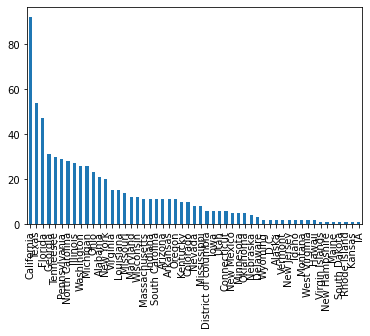

In [30]:
df['Estado'].value_counts().plot.bar()

Representa el total de estados, en los que llegaron a ocurrir tiroteos desde 1990 a la fecha actual.
Como no se ve muy bien los estados a continuación solo mencionare 20 de ellos.

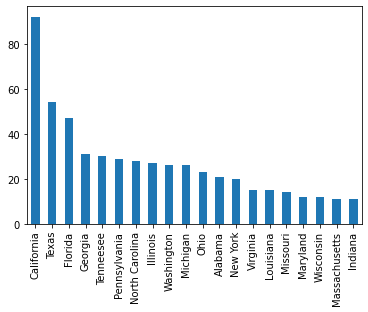

In [31]:
df['Estado'].value_counts().head(20).plot.bar()

Se pueden ver los primeros 20 estados donde suelen ocurrir más tiroteos

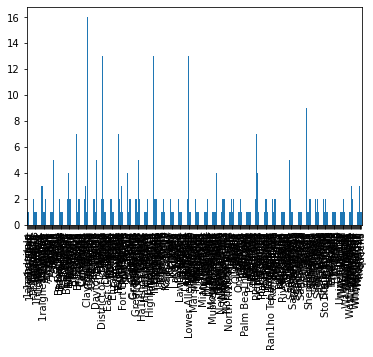

In [32]:
df['Ciudad'].value_counts().sort_index().plot.bar()

Ahora bien, estas son las ciudades donde ocurrieron los tiroteos desde 1990 a la fecha actual.

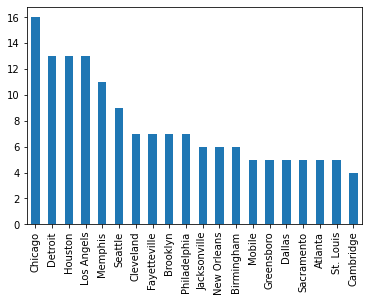

In [33]:
df['Ciudad'].value_counts().head(20).plot.bar()

Se pueden ver las primeras 20 ciudades donde suelen ocurrir más tiroteos

## Gráficas de lineas

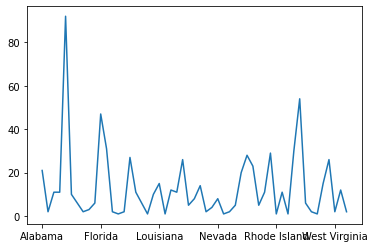

In [34]:
df['Estado'].value_counts().sort_index().plot.line()

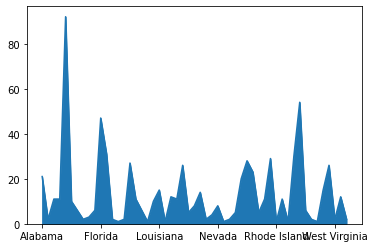

In [35]:
df['Estado'].value_counts().sort_index().plot.area()

Se utiliza una grafica lineal, para observar el comportamiento de los estados, pudiendo ver cuales estados presentan mas tiroteos en toda su historia.

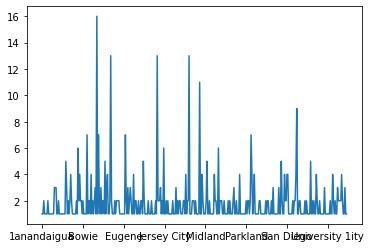

In [36]:
df['Ciudad'].value_counts().sort_index().plot.line()

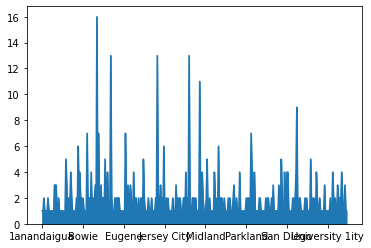

In [37]:
df['Ciudad'].value_counts().sort_index().plot.area()

Se utiliza una grafica lineal, para observar el comportamiento de las ciudades, pudiendo ver cuales ciudades presentan mas tiroteos en toda su historia.

Utilice todos los datos para ver el comportamiento de la gráfica, ya que si solo tomaba los primeros 20 se veía una linea

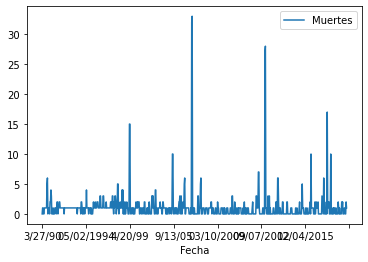

In [38]:
df.plot.line(x='Fecha', y='Muertes')

Realizamos un plot scatter para ver la tendencia de nuestros datos.

## Histogramas

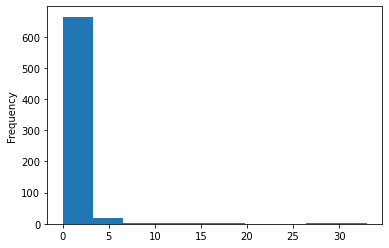

In [39]:
df[df['Muertes'] < 35]['Muertes'].plot.hist()

Quería poner el histograma de los Estados y las Ciudades, pero python me decia que solo valores "númericos" no "texto"
Entonces en este histograma refleja las "Muertes" que ocurren en los tiroteos, lamentablemente se puede ver que ocurre con mayor demanda la muerte de 0 a 5 personas por cada tiroteo ocurrido.

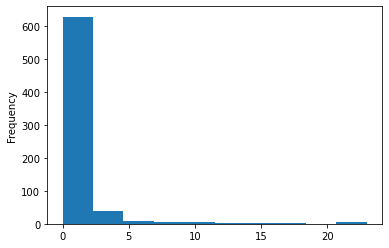

In [40]:
df['Heridos'].plot.hist()

Podemos ver que este histograma refleja los "Heridos" que ocurren en los tiroteos, suele seguir un mismo comportamiento que el número de muertos.

## Gráficos Circulares

In [41]:
import pandas as pd
from matplotlib.pyplot import pie, axis, show
%matplotlib inline

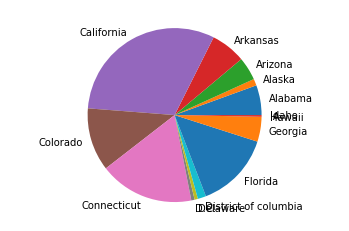

In [42]:
sums = df.groupby(df["Estado"])["Muertes"].sum().head(15)
axis('equal');
pie(sums, labels=sums.index);
show()

Urrl: https://stackoverflow.com/questions/56294597/how-to-create-a-pie-chart-from-csv-file-using-python 

Decidimos utilizar la grafica de pastel ya que nos ayuda a entender, en este caso que estados presentan mayores casos de muertes a causas de los tiroteos, solo mostre 15 estados ya que al poner todos, la grafica no es entendible

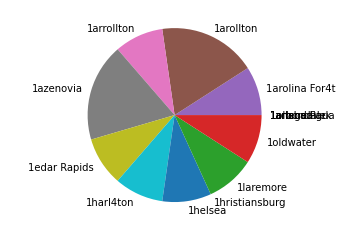

In [43]:
sums = df.groupby(df["Ciudad"])["Muertes"].sum().head(15)
axis('equal');
pie(sums, labels=sums.index);
show()

Mismo caso, solo que en vez de "Estados" maneje las "Ciudades", al igual solo mostre solo 15 ciudades, por que si hubiera puesto todas las ciudades no se entenderia bien el grafico.

# Graficar datos bi-variantes

## Scater plot

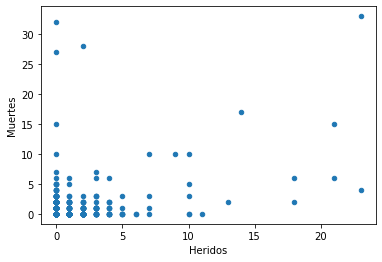

In [44]:
df[df['Heridos'] < 690].sample(690).plot.scatter(x='Heridos', y='Muertes')

Esta grafica nos muestra que el número de "Heridos" y el número de "Muertes estan relacionados. Esto significa que entre menos heridos tengamos menos cantidad de muertes sucedera en un tiroteo escolar de EUA.

## Boxplot

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

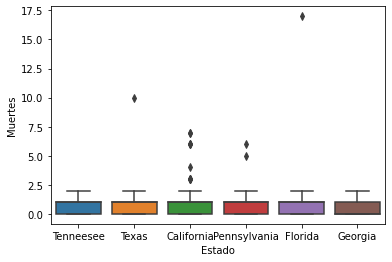

In [49]:
dfBP = df[df.Estado.isin(df.Estado.value_counts().head(6).index)]

sns.boxplot(x='Estado',y='Muertes',data=dfBP)

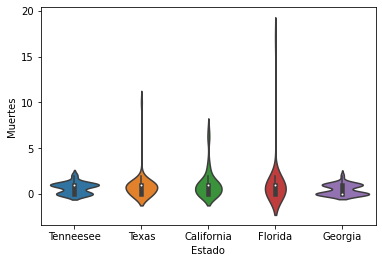

In [50]:
sns.violinplot(
    x='Estado',
    y='Muertes',
    data=df[df.Estado.isin(df.Estado.value_counts()[:5].index)]
)

Utilice este Boxplot y Boxplot tipo violin, ya que me interesa saber si tengo datos atípicos, y por lo que se puede ver es correcto tengo datos atipicos, aunque algunos de ellos se presentan como eventos extraordinarios, esto quiere decir que muchas personas perdieron la vida en algun tiroteo de dicho estado.

## Seaborn

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df.head()

,Fecha,Ciudad,Estado,Latitud,Longitud,Tipo_de_área,Escuela,Muertes,Heridos,True,Wikp_o_Pah,Total victimas
0,3/27/90,Brooklyn,New York,40.664300,-73.9385,0,C,0,1.0,0,Wikp,1.0
1,5/20/90,Centerville,Tenneesee,35.750350,-86.250270,1,HS,1,0.0,0,Pah,1.0
2,8/26/90,Las Vegas,Nevada,39.250210,-116.751190,2,HS,1,0.0,0,Pah,1.0
3,09/11/1990,San Antonio,Texas,20.025560,-99.195560,0,HS,0,3.0,0,Wikp,3.0
4,01/08/1991,Ri1hardson,Texas,20.025560,-99.195560,2,HS,0,0.0,0,Pah,0.0


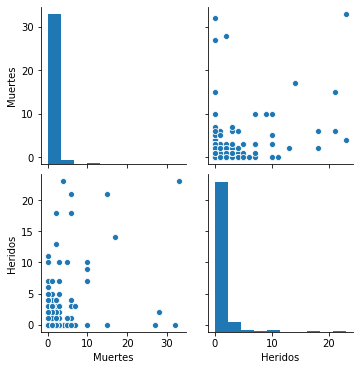

In [53]:
sns.pairplot(df[['Muertes', 'Heridos']])

# Graficas multivariantes

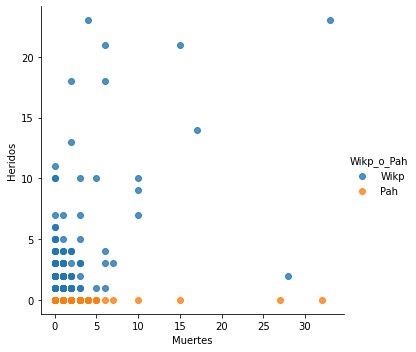

In [54]:
sns.lmplot(x='Muertes', y='Heridos', hue='Wikp_o_Pah', 
           data=df.loc[df['Wikp_o_Pah'].isin(['Wikp', 'Pah'])], 
           fit_reg=False)

Decidí tomar el Wikp_o_Pah, ya que me llamó la atención ver como ambas chocan y ocurre un Pah:solo ocurrio muertes o un Wikp:ocurrio muerte y heridos.

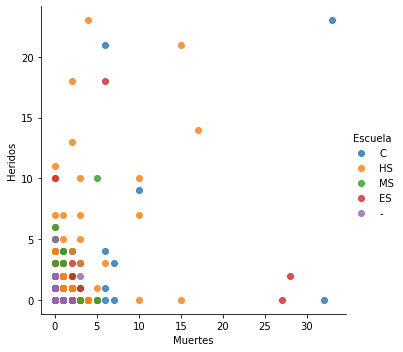

In [55]:
sns.lmplot(x='Muertes', y='Heridos', hue='Escuela', 
           data=df.loc[df['Escuela'].isin(['C', 'HS','MS','ES','-'])], 
           fit_reg=False)

En esta gráfica multivariante decidi tomar la Escuela, ya que me interesa saber a que nivel educativo suelen haber mas "Muertes" y "Heridos a causa del tiroteo en EUA, por lo que la Escuela se divide en: C=universidad, HS=escuela secundaria, MS=escuela intermedia, ES=escuela primaria, -=desconocido

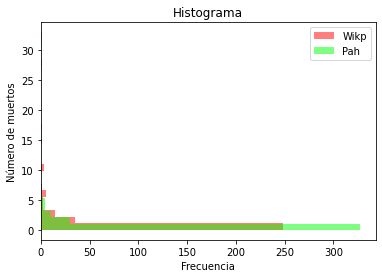

In [56]:
W = plt.hist(df[df["Wikp_o_Pah"] == "Wikp"].Muertes,bins=30,fc = (1,0,0,0.5),label = "Wikp",orientation='horizontal')
P = plt.hist(df[df["Wikp_o_Pah"] == "Pah"].Muertes,bins=30,fc = (0,1,0,0.5),label = "Pah",orientation='horizontal')
plt.legend()
plt.xlabel("Frecuencia")
plt.ylabel("Número de muertos")
plt.title("Histograma")
plt.show()

CORRECIÓN: solo se nos pidio cambiar el orden de la gráfica para que se visualice mejor.

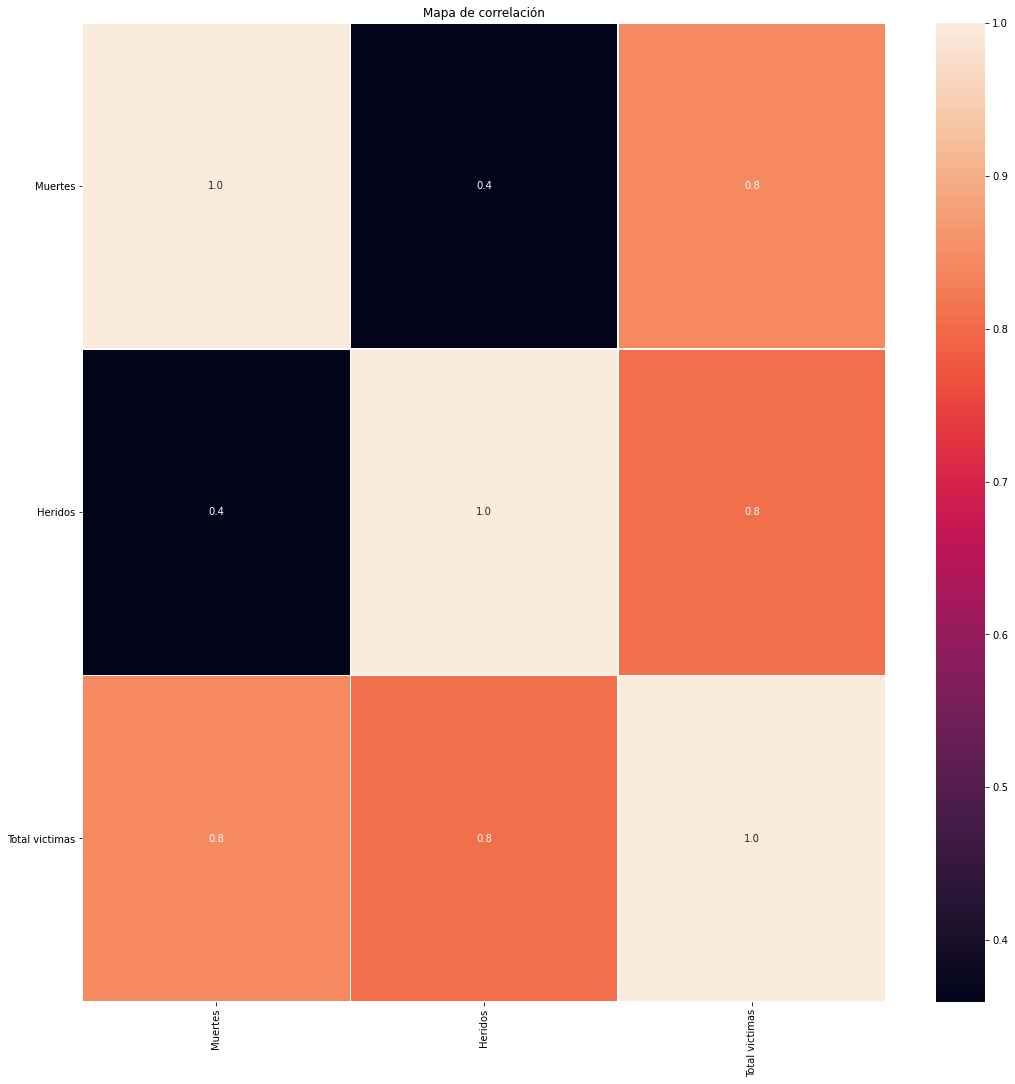

In [57]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

Para esta grafica de aquí arriba lo que podemos hacer es cambiar los nombres de:
Las escuelas a números, representativos como 1,2,3,4,5
Tambien para "Tipo de area", "True", "Wikp o Pah"
Una vez que hagamos eso la grafica de arriba se podra ver como la del ejemplo de la maestra.

# Cambiar datos por números

### Solo realice esto para que se pudiera ver mejor la última gráfica

In [58]:
import pandas as pd
import numpy as np
import json

In [59]:
dfModificado = pd.read_csv("Pah_whikp_modificado.csv")

In [60]:
dfModificado.columns = ['Fecha','Ciudad','Estado','Latitud','Longitud','Tipo_de_área','Escuela','Muertes','Heridos','True','Wikp_o_Pah','Descripción']

In [61]:
dfModificado0= dfModificado.fillna(0)

In [62]:
dfModificado0['Total victimas']=dfModificado0.loc[dfModificado0['Muertes']>=0, ['Muertes','Heridos']].sum(axis=1)


In [63]:
dfModificado0.drop(['Descripción'], axis=1)

,Fecha,Ciudad,Estado,Latitud,Longitud,Tipo_de_área,Escuela,Muertes,Heridos,True,Wikp_o_Pah,Total victimas
0,3/27/90,Brooklyn,New York,40.6643,-73.9385,0,1.0,0,1.0,0.0,0,1.0
1,5/20/90,1enterville,Tenn4see,35.75035,-86.25027,1,2.0,1,0.0,0.0,1,1.0
2,8/26/90,Las Vegas,Nevada,39.25021,-116.75119,2,2.0,1,0.0,0.0,1,1.0
3,09/11/1990,San Antonio,Texas,20.02556,-99.19556,0,2.0,0,3.0,0.0,0,3.0
4,01/08/1991,Ri1hardson,Texas,20.02556,-99.19556,2,2.0,0,0.0,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
690,1/14/20,Bellaire,Texas,20.02556,-99.19556,0,2.0,1,0.0,0.0,0,1.0
691,1/14/20,Fort Worth,Texas,20.02556,-99.19556,0,2.0,0,2.0,0.0,0,2.0
692,1/23/20,Oxnard,1alifornia,37.25022,-119.7512600,0,4.0,0,1.0,0.0,0,1.0
693,02/03/2020,1ommer1e,Texas,20.02556,-99.19556,0,1.0,2,1.0,0.0,0,3.0


Pequeño experimento para ver el comportamiento, ya que antes de esta base de datos solo teniamos dos columnas con números enteros, ahora para las columnas "Tipo de área", "True" y "Wikp o Pah", de texto pasaron a datos númericos.

Tipo de area: otro tipo=0, subbarn=1, urban=2
Escuela: C=Universidad=1, HS=Escuela secundaria=2, MS=Escuela intermedia=3, ES=Escuela primaria=4, -=desconocido=5
TRUE: Falso=0, Verdadero=1
Wikp o Pah: Wikp=0, Pah=1

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

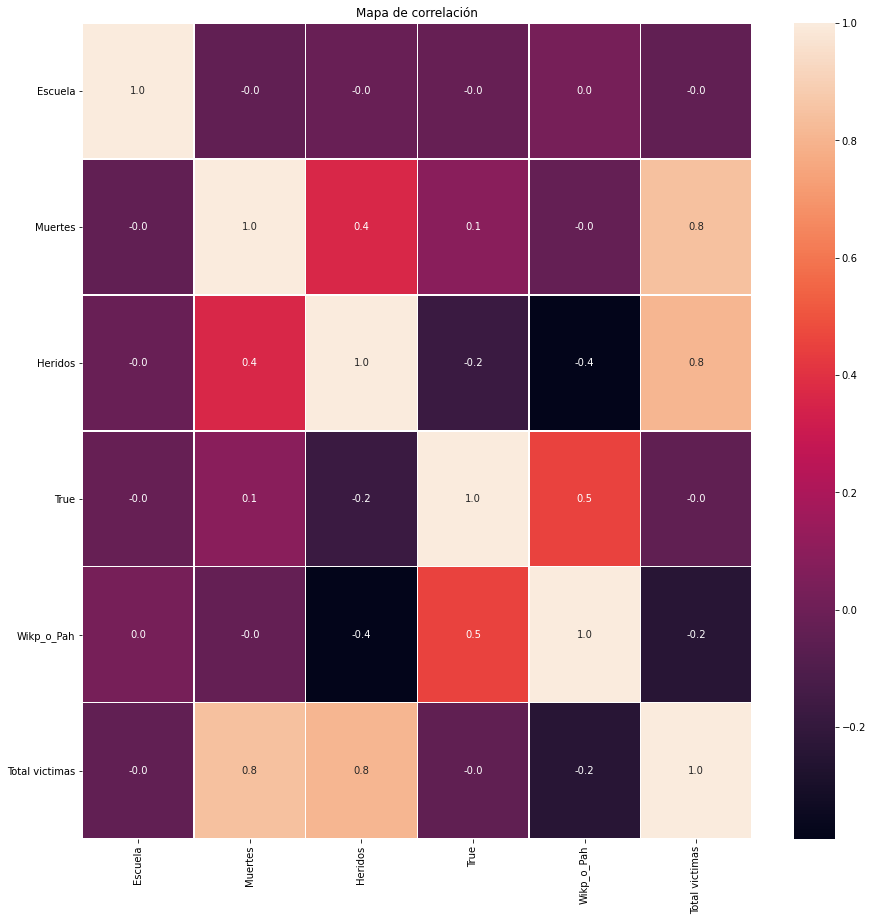

In [65]:
f,ax=plt.subplots(figsize = (15,15))
sns.heatmap(dfModificado0.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()